#  **CART**
Team member: **Lihao Xu, Zheyu Shi, Haowen Qin, Yaqi Sun**

Link to the github repo: https://github.com/Kaitlyn-Sun/Classification-and-Regression-Tree-for-classification/tree/main

## Introduction of the CART

The Classification and Regression Tree (CART) algorithm (Breiman et al., 1984) remains one of the most influential and widely used tree-based learning methods. Its appeal stems from its interpretability, flexibility, and ability to automatically discover nonlinear decision boundaries. However, despite these strengths, CART also exhibits several well-known limitations, particularly regarding stability and tendency to overfit.

a. Advantages

a1. Interpretability and transparency

CART produces a hierarchical, rule-based structure that is easy to explain and understand. Its decision rules are human-readable, making it widely used in applied domains where interpretability is crucial (Breiman et al., 1984).<br><br>

a2. Good ability to model nonlinear relationships

The recursive partitioning mechanism allows CART to automatically capture nonlinear interactions between features without requiring explicit feature engineering (Hastie, Tibshirani and Friedman, 2009).<br><br>

a3. Built-in feature selection

Since CART selects splits based on impurity reduction, irrelevant or weakly predictive features tend not to be chosen, providing an implicit form of feature selection (Kotsiantis, 2007).<br><br>

b. Limitations

b1. High model instability

CART is sensitive to small perturbations in the training data. Slight variations may produce very different tree structures, indicating high variance (Breiman, 1996).<br><br>

b2. Prone to overfitting

Unrestricted tree growth leads to deep and highly complex trees that overfit the training data. Pruning is essential to maintain generalisation (Breiman et al., 1984).<br><br>

b3. Insufficient splits

Since all splits are axis-aligned, CART may require many splits to approximate diagonal or curved decision boundaries, reducing efficiency (Loh, 2011).<br><br>

## Representation
The representation of this project is a binary decision tree, which is constructed via recursive partitioning of the feature space.

Each internal node corresponds to a test of the form: $$x_j< \tau,  $$ where j is a feature index, and $\tau$ is a threshold.
Each leaf node stores a class distribution and produces a label prediction through: $$ \hat{y} = \arg\max_{k} \; c_k(t)$$
Therefore, the hypothesis representation is:$$H=\{ \text{All binary trees with axis-aligned threshold splits} \}$$<br><br>

## Loss function
a. Shannon Entropy

Shannon Entropy is a typical measurement of uncertainty originating from information theory. For a node containing samples from X classes, the empirical class distribution is:
$$p_k=\frac{c_k}{n},    k=1....K$$
where $c_k$ is the count of class X, and $n=\sum_{k}c_k$

The entropy of node is defined:
$$H(p)=-\sum_{k=1}^K\ p_k logp_k$$

where $p_k$ is non-zero. We will exclude those samples with zero $p_k$ in the algorithm implementation.

A node is pure when all samples belong to one class, which case $H=0$, so the entropy will increase as the class distribution's uncertainty increases. When the class is uniformly distributed, the entropy will reach its maximum.<br><br>

b. Gini Impurity

The classification and regression tree algorithm has a default impurity measurement, which is defined:
$$G(p)=1-\sum_{k=1}^K\ p_k^2$$
Gini can be regarded as the probability that two random samples from the node belong to different classes. Similar to the entropy, Gini is zero at first and increases as the labels get more and more mixed.<br><br>

c. Postpruning Objective

During the cost-complexity pruning(which will be introduced in detail in the following chapter), the model needs to minimize: $$R_\alpha(T)=\sum_{t \in L(T)} N_t \, I(t) + \alpha \, |L(T)|$$
where $N_t$ is the weighted sample in leaf t, $I(t)$ is the impurity of leaf t, $\alpha$ is the user-specified parameter, $L(T)$ is the amount of leaves.<br><br>

## Optimizer
The optimizer in a decision tree is NOT gradient-based. Instead, it uses a greedy, top-down recursive algorithm, often called recursive binary splitting, which usually consists of three parts:

a. Greedy split selection

At each node:

- Enumerate candidate features

- Enumerate candidate threshold

- Compute all impurity decreases

- Select the best $(j,\tau)$ among them

Thus, it is obvious that this selection is merely greedy optimization with local search focusing on computational efficiency rather than guaranteeing a global optimal tree.<br><br>

b. Prepruning

This part will be introduced in detail in the following chapter.<br><br>

c. Postpruning

This part will be introduced in detail in the following chapter.<br><br>

## Class Weighting for Imbalanced Data
For these real-world problems, the class distribution is not balanced, unlike the ideal model. If there is no correction, the decision tree will tend to favor the majority class and result in biased prediction. To deal with this problem, the class weight is introduced, which can be able to rescale the sample contribution of each class. Given the integer labels $Y∈ \{0,1,...,K-1\}$, three modes are supported:

a. No weighting

Each class is equally weighted for all c: $$w_c=1$$<br><br>

b. Balanced weighting

The weight for the balanced weight of the class is:$$w_c=\frac{N}{K n_c}$$ Where $N$ is the amount of samples,

$K$ is the number of classes,

$n_c$ is the count of class c.<br><br>

c. User-specified weighting

The user can override a certain weight.<br><br>

## Decision Tree Classifier Program
For this project, we developed a CART classifier, which is derived from the classical CART model. This design allows the model to adapt to various data characteristics—such as class imbalance or high-dimensional feature spaces—while offering users explicit control over the tree-building process. The algorithm will consist of several key functions: hyperparameter setting, recursive tree construction, prepruning and postpruning, estimation of leaf prediction and probability, model evaluation, etc.

a. Hyperparameter Setting:

It controls how the tree is grown and the complexity.
- Impurity criterion: Determine the node impurity measurement $I(t)$, using Shannon and Gini as described above.
- Splitter: Two labels, \{best, random\}
"best": For each node, we examine all candidate feature–threshold pairs and choose the one that maximizes impurity reduction.
"random": We randomly select a single feature and only search thresholds for that feature. This changes the variance–bias trade-off and is analogous to the feature randomness used in random forests.
- Depth and sample size: Contribute to the prepruning part and prevent overfitting.
- Minimum decrease for impurity: A candidate split at node t is accepted if and only if the impurity decrease is lower than this threshold $\Delta I\ =T(t)-(w_L I(t_L)+w_R I(t_R))$ where $t_L t_R$ are the left and right child nodes, and $w_L w_R$ are the fractions of weighted samples of each sides.
- Features subsampling: Controls the number of features to be considered.
- Class and sample weights: Combined into a sample vector $w_i=weight_c(y_i)*weight_s(t_i)$
- Cost-complexity pruning parameter: Controls post-pruning by $ R_a(T)=R(T)+a|L(T)|$, where $T$ is the subtree, $L(T)$ is the leaves set and $R(T)$ is the leaves' impurity.<br><br>

b. Recursive tree construction:

When we build a new tree, we create a node $t$ and calculate:
- Weighted class counts: $c_k(t)=\sum_{i:y_i=k}w_i$
- Majority class: $y'(t)=arg \max_{k}c_k(t)$
- Candidate threshold: If splitting is allowed, we need to choose a subset of features first, for each selected feature $h$, computing candidate thresholds by considering the midpoints between distinct sorted values of that feature $T_h=\frac{v_j+v_k}{2}$, where $k=j+1$, which indicates that $v_k$ is sorted unique value of $X_h$.<br><br>

c. Prepruning and postpruning:

c1. Prepruning: Multiple stopping conditions are checked before searching for the best split, and the node becomes a leaf whenever any of the following criteria are satisfied.

If any of the following conditions hold, the node with a leaf and no children:

- Node is pure.
- Reaching the maximum depth.
- Node has less than minimum samples to split.<br><br>

c2. Postpruning: Minimal cost-complexity pruning policy, for each internal node t, let $T_t$ denote the subtree rooted at t and $L(T_t)$ is their leaves, the effective complexity parameter associated with node t is $g(t)=\frac{R(t)-R(T_t)}{|L(T_t)|-1}$

- For the current tree, we need to calculate all $g(t)$ for every internal node.
- Find the minimum value, denoted as $a_k$
- Prune all nodes t with $g(t)=a_k$
- Repeat on the smallest tree, only leave the root node.

Therefore, the pruning path is: $0=a_0<a_1<...<a_K$<br><br>

d. Estimation of leaf prediction and probability:
- Prediction: To predict the label of a new sample X, we traverse the tree from the root, and at every internal node with feature index j and threshold $\tau$, we will go left if $x_j<=\tau$, and vice versa. And we stop at a leaf, then output its stored majority class.
- Estimation: For a sample that ends in leaf t, we have a non-negative weighted count at that leaf: $p'_k(t)=\frac{max[c_k(t),0]}{\sum_{l}[c_l(t),0]}$. If numerical issues arise,  like the sum is close to zero, we fall back to a uniform distribution over classes. The predicted probability vector has shape K, and stacking over all samples yields an array of shape $(n_s, K)$<br><br>

e. Model evalutaion:
- Accuracy rate: $$\text{Acc} =
\begin{cases}
\dfrac{1}{n} \displaystyle\sum_{i=1}^{n} \mathbf{1}[y'_i = y_i], & \text{if no sample\_weight}, \\[10pt]
\dfrac{\sum_{i=1}^{n} w_i \, \mathbf{1}[y'_i = y_i]}{\sum_{i=1}^{n} w_i}, & \text{otherwise}. 
\end{cases}$$
Where y'(i) is predicted labels.

#### These are the dependencies we have used, please make sure you get all libraries.

In [1]:
import numpy as np
import math
from dataclasses import dataclass
from typing import Optional, Tuple, List, Any, Dict, Iterable
import warnings

## **(2.)Model**

In [2]:
def _entropy(counts: np.ndarray) -> float:
    """
    Shannon entropy on class counts.
    counts will be generated by np.bincount().
    """
    n = counts.sum()
    if n == 0:
        return 0.0
    p = counts / n
    # avoid log(0)
    mask = p > 0
    return float(-np.sum(p[mask] * np.log(p[mask])))


def _gini(counts: np.ndarray) -> float:
    """Gini impurity on class counts."""
    n = counts.sum()
    if n == 0:
        return 0.0
    p = counts / n
    return float(1.0 - np.sum(p * p))


def _criterion_from_name(name: str):
    """Map string name to impurity function."""
    name = name.lower()
    if name == "gini":
        return _gini
    elif name in ("entropy", "log_loss"):
        # NOTE: here we treat "log_loss" as entropy
        return _entropy
    else:
        raise ValueError(f"Unknown criterion: {name}")


def _compute_class_weight_vector(
    y_int: np.ndarray, n_classes: int, class_weight
) -> np.ndarray:
    """
    Return per-class weight vector w_c of shape [n_classes].
    """
    if class_weight is None:
        return np.ones(n_classes, dtype=float)

    if class_weight == "balanced":
        # n_samples / (n_classes * bincount)
        binc = np.bincount(y_int, minlength=n_classes).astype(float)
        # avoid division by zero
        binc[binc == 0] = 1.0
        w = y_int.size / (n_classes * binc)
        return w

    # dict-like mapping: {class_index: weight}
    w = np.ones(n_classes, dtype=float)
    for cls, val in class_weight.items():
        w[int(cls)] = float(val)
    return w


@dataclass
class _Node:
    left: Optional["_Node"] = None
    right: Optional["_Node"] = None
    feature: Optional[int] = None       # index of feature to split on
    threshold: Optional[float] = None   # <= threshold -> left; > threshold -> right
    impurity: float = 0.0               # impurity of node
    n_node_samples: float = 0.0         # total (weighted) samples in node
    value: Optional[np.ndarray] = None  # weighted counts per class [n_classes]
    prediction: Optional[int] = None    # majority class index
    depth: int = 0                      # depth (root has depth 0)

In [3]:
class MyDecisionTreeClassifier:
    """
    A simplified Decision Tree classifier, with sklearn-like API.

    Parameters
    ----------
    criterion : {"gini", "entropy", "log_loss"}, default="gini"
        Function to measure the quality of a split.

    splitter : {"best", "random"}, default="best"
        Strategy used to choose the split at each node.
        - "best" : choose the best split among all features and thresholds.
        - "random" : for each feature in the feature subset, sample ONE random
          threshold and choose the best among those (approximate sklearn).

    max_depth : int | None, default=None
        Maximum depth of the tree.

    min_samples_split : int | float, default=2
        Minimum number of samples required to split an internal node.
        If float, it is treated as a fraction of the total number of samples
        and then ceiled.

    min_samples_leaf : int | float, default=1
        Minimum number of samples required to be at a leaf node.
        If float, treated as a fraction of the total number of samples.

    min_weight_fraction_leaf : float, default=0.0
        Minimum weighted fraction of the sum total of weights (of all
        input samples) required to be at a leaf node.
        NOTE: we implement this relative to the GLOBAL total weight,
        matching sklearn's semantics.

    min_impurity_decrease : float, default=0.0
        A node will be split if this split induces a decrease of the impurity
        greater than or equal to this value.

    max_features : int | float | {"sqrt", "log2"} | None, default=None
        Number of features to consider when looking for the best split.

    random_state : int | None, default=None
        Seed of the pseudo random number generator.

    class_weight : dict | "balanced" | None, default=None
        Weights associated with classes.

    ccp_alpha : non-negative float, default=0.0
        Complexity parameter used for Minimal Cost-Complexity Pruning.
    """

    def __init__(
        self,
        criterion: str = "gini",
        splitter: str = "best",
        max_depth: Optional[int] = None,
        min_samples_split: int = 2,
        min_samples_leaf: int = 1,
        min_weight_fraction_leaf: float = 0.0,
        min_impurity_decrease: float = 0.0,
        max_features: Optional[Any] = None,
        random_state: Optional[int] = None,
        class_weight: Optional[Any] = None,
        ccp_alpha: float = 0.0,
    ):
        self.criterion = criterion
        self.splitter = splitter
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.min_weight_fraction_leaf = float(min_weight_fraction_leaf)
        self.min_impurity_decrease = float(min_impurity_decrease)
        self.max_features = max_features
        self.random_state = random_state
        self.class_weight = class_weight
        self.ccp_alpha = float(ccp_alpha)

        # will be filled during fit
        self.n_features_in_: Optional[int] = None
        self.n_classes_: Optional[int] = None
        self.classes_: Optional[np.ndarray] = None
        self.class_weight_: Optional[np.ndarray] = None
        self.root_: Optional[_Node] = None
        self._total_weight_: Optional[float] = None  # NOTE: global total sample weight

        self.rng = np.random.RandomState(random_state)

    # ---------------------------------------------------------------
    # FIT
    # ---------------------------------------------------------------
    def fit(
        self,
        X: np.ndarray,
        y: np.ndarray,
        sample_weight: Optional[np.ndarray] = None,
    ):
        """Build the decision tree classifier from the training set (X, y)."""
        X = np.asarray(X)
        y = np.asarray(y)
        assert X.ndim == 2 and y.ndim == 1 and len(y) == len(X)

        n_samples = X.shape[0]

        # resolve min_samples_leaf
        min_samples_leaf = self.min_samples_leaf
        if isinstance(min_samples_leaf, float):
            min_samples_leaf = max(1, int(math.ceil(min_samples_leaf * n_samples)))

        # resolve min_samples_split
        min_samples_split = self.min_samples_split
        if isinstance(min_samples_split, float):
            min_samples_split = max(2, int(math.ceil(min_samples_split * n_samples)))
        # sklearn also enforces min_samples_split >= 2 * min_samples_leaf
        min_samples_split = max(min_samples_split, 2 * min_samples_leaf)

        self._resolved_min_samples_leaf_ = min_samples_leaf
        self._resolved_min_samples_split_ = min_samples_split

        self.n_features_in_ = X.shape[1]
        self.classes_, y_int = np.unique(y, return_inverse=True)
        self.n_classes_ = len(self.classes_)

        # class_weight and sample_weight combined into per-sample weight
        class_w = _compute_class_weight_vector(y_int, self.n_classes_, self.class_weight)
        self.class_weight_ = class_w.copy()

        if sample_weight is None:
            sw = class_w[y_int]
        else:
            sw = class_w[y_int] * np.asarray(sample_weight, dtype=float)

        # NOTE: global total weight stored for min_weight_fraction_leaf
        self._total_weight_ = float(sw.sum())

        # build tree
        self.root_ = self._build_tree(X, y_int, sw, depth=0)

        # cost-complexity pruning
        if self.ccp_alpha > 0.0:
            self._prune_to_alpha(self.ccp_alpha)

        return self

    # ---------------------------------------------------------------
    # PREDICT / PREDICT_PROBA / SCORE
    # ---------------------------------------------------------------
    def predict(self, X: np.ndarray) -> np.ndarray:
        X = np.asarray(X)
        preds = [self._predict_row(self.root_, row) for row in X]
        # map integer indices back to original labels
        return self.classes_[np.array(preds, dtype=int)]

    def predict_proba(self, X: np.ndarray) -> np.ndarray:
        """
        Predict class probabilities for X.
        Closer to sklearn: leaf frequencies, with minimal fallback.
        """
        X = np.asarray(X)
        proba = []
        for row in X:
            node = self.root_
            while node.feature is not None:
                node = node.left if row[node.feature] <= node.threshold else node.right

            # node.value contains weighted counts
            if node.value is None:
                # very unlikely; just uniform
                prob = np.ones(self.n_classes_) / self.n_classes_
            else:
                counts = node.value.astype(float)
                # small numerical guard
                s = counts.sum()
                if s <= 0.0:
                    prob = np.ones(self.n_classes_) / self.n_classes_
                else:
                    # NOTE: no clipping / fancy eps; just normalize
                    prob = counts / s
            proba.append(prob)
        return np.vstack(proba)

    def score(
        self,
        X: np.ndarray,
        y: np.ndarray,
        sample_weight: Optional[np.ndarray] = None,
    ) -> float:
        """Accuracy score."""
        y_pred = self.predict(X)
        if sample_weight is None:
            return float(np.mean(y_pred == y))
        sw = np.asarray(sample_weight, dtype=float)
        return float(np.sum(sw * (y_pred == y)) / np.sum(sw))

    # ---------------------------------------------------------------
    # COST-COMPLEXITY PRUNING PATH
    # ---------------------------------------------------------------
    def cost_complexity_pruning_path(
        self,
        X: np.ndarray,
        y: np.ndarray,
        sample_weight: Optional[np.ndarray] = None,
    ):
        """
        Return a pruning path: ccp_alphas and corresponding subtree’s
        weighted sum of leaf impurity.
        """
        est = MyDecisionTreeClassifier(
            criterion=self.criterion,
            splitter=self.splitter,
            max_depth=self.max_depth,
            min_samples_split=self.min_samples_split,
            min_samples_leaf=self.min_samples_leaf,
            min_weight_fraction_leaf=self.min_weight_fraction_leaf,
            min_impurity_decrease=self.min_impurity_decrease,
            max_features=self.max_features,
            random_state=self.random_state,
            class_weight=self.class_weight,
            ccp_alpha=0.0,  # no pruning here
        )
        est.fit(X, y, sample_weight=sample_weight)

        alphas = [0.0]
        impurities = [est._tree_total_leaf_impurity(est.root_)]
        tmp_tree = est._clone_tree(est.root_)

        while True:
            candidates: List[Tuple[_Node, float]] = []
            self._collect_g_t(tmp_tree, candidates)
            if not candidates:
                break

            g_values = [g for (_, g) in candidates]
            min_g = min(g_values)

            # prune all nodes with g(t) == min_g (within tolerance)
            for node, g in candidates:
                if abs(g - min_g) < 1e-12:
                    self._prune_at(node)

            alphas.append(min_g)
            impurities.append(est._tree_total_leaf_impurity(tmp_tree))

            # stop if pruned to root
            if tmp_tree.left is None and tmp_tree.right is None:
                break

        return {
            "ccp_alphas": np.array(alphas, dtype=float),
            "impurities": np.array(impurities, dtype=float),
        }

    # ---------------------------------------------------------------
    # TREE BUILDING
    # ---------------------------------------------------------------
    def _build_tree(
        self,
        X: np.ndarray,
        y: np.ndarray,
        sw: np.ndarray,
        depth: int,
    ) -> _Node:
        node = _Node(depth=depth)
        counts = self._weighted_counts(y, sw)
        node.value = counts
        node.n_node_samples = float(sw.sum())

        impurity_func = _criterion_from_name(self.criterion)
        node.impurity = impurity_func(counts)
        node.prediction = int(np.argmax(counts))

        # stop conditions: pure, depth constraint, or too few samples
        if (
            self._is_pure(y)
            or (self.max_depth is not None and depth >= self.max_depth)
            or (len(y) < self._resolved_min_samples_split_)
        ):
            return node

        feature_indices = self._choose_feature_subset(X.shape[1])
        best = self._find_best_split(X, y, sw, node.impurity, feature_indices)

        if best is None:
            return node

        j, thr, (L_idx, R_idx), impL, impR = best

        # min_impurity_decrease constraint
        total_w = sw.sum()
        wL = sw[L_idx].sum() / total_w
        wR = 1.0 - wL
        impurity_decrease = node.impurity - (wL * impL + wR * impR)
        if impurity_decrease + 1e-12 < self.min_impurity_decrease:
            return node

        nL = len(L_idx)
        nR = len(R_idx)
        wL_sum = sw[L_idx].sum()
        wR_sum = sw[R_idx].sum()

        # leaf size constraint
        if (
            nL < self._resolved_min_samples_leaf_
            or nR < self._resolved_min_samples_leaf_
        ):
            return node

        # NOTE: min_weight_fraction_leaf now uses GLOBAL total weight
        if self._total_weight_ is None:
            total_weight_global = total_w
        else:
            total_weight_global = self._total_weight_

        if self.min_weight_fraction_leaf > 0.0:
            min_w = self.min_weight_fraction_leaf * total_weight_global
            if (wL_sum < min_w) or (wR_sum < min_w):
                return node

        # commit split
        node.feature = int(j)
        node.threshold = float(thr)
        node.left = self._build_tree(X[L_idx], y[L_idx], sw[L_idx], depth + 1)
        node.right = self._build_tree(X[R_idx], y[R_idx], sw[R_idx], depth + 1)
        return node

    # ---------------------------------------------------------------
    # HELPER METHODS (PURITY, FEATURES, COUNTS, THRESHOLDS)
    # ---------------------------------------------------------------
    def _is_pure(self, y: np.ndarray) -> bool:
        return np.all(y == y[0])

    def _choose_feature_subset(self, d: int) -> np.ndarray:
        """Randomly choose k features based on parameter max_features."""
        if self.max_features is None:
            k = d
        elif isinstance(self.max_features, int):
            k = max(1, min(d, self.max_features))
        elif isinstance(self.max_features, float):
            k = max(1, int(round(self.max_features * d)))
        elif isinstance(self.max_features, str):
            if self.max_features == "sqrt":
                k = max(1, int(round(math.sqrt(d))))
            elif self.max_features == "log2":
                k = max(1, int(round(math.log2(d))))
            else:
                raise ValueError(
                    "max_features must be int/float/'sqrt'/'log2'/None"
                )
        else:
            raise ValueError("Invalid max_features")

        idx = np.arange(d, dtype=int)
        if k == d:
            return idx
        return self.rng.choice(idx, size=k, replace=False)

    def _weighted_counts(self, y: np.ndarray, sw: np.ndarray) -> np.ndarray:
        return np.bincount(y, weights=sw, minlength=self.n_classes_).astype(float)

    def _candidate_thresholds(self, xj: np.ndarray) -> np.ndarray:
        """
        Candidate thresholds are midpoints between sorted unique values.
        Used by splitter='best'.
        """
        vals = np.unique(xj)
        if vals.size <= 1:
            return np.array([], dtype=float)
        if vals.size == 2:
            return np.array([(vals[0] + vals[1]) / 2.0], dtype=float)
        vals = np.sort(vals)
        return (vals[:-1] + vals[1:]) / 2.0

    def _random_threshold(self, xj: np.ndarray) -> Optional[float]:
        """
        Sample ONE random threshold for splitter='random', roughly mimicking
        sklearn behavior: choose a random adjacent pair of unique sorted values
        and return their midpoint.
        """
        vals = np.unique(xj)
        if vals.size <= 1:
            return None
        if vals.size == 2:
            return float((vals[0] + vals[1]) / 2.0)
        # choose random index among 0..(len(vals)-2)
        k = self.rng.randint(0, vals.size - 1)
        thr = (vals[k] + vals[k + 1]) / 2.0
        return float(thr)

    # ---------------------------------------------------------------
    # SPLIT SEARCH
    # ---------------------------------------------------------------
    def _find_best_split(
        self,
        X: np.ndarray,
        y: np.ndarray,
        sw: np.ndarray,
        impurity_parent: float,
        feature_indices: Iterable[int],
    ):
        """
        Return (feature_index, threshold, (left_idx, right_idx),
                impurity_left, impurity_right)
        or None if there's no valid split.

        splitter='best':
          exhaustive over thresholds for each feature in feature_indices.

        splitter='random':
          one random threshold per feature in feature_indices.
        """
        total_weight = sw.sum()
        impurity_func = _criterion_from_name(self.criterion)
        best_gain = -np.inf
        best_tuple = None
        eps_gain = 1e-15

        feature_indices = np.asarray(list(feature_indices), dtype=int)
        # NOTE: randomize feature order to mimic sklearn internal behavior
        self.rng.shuffle(feature_indices)

        if self.splitter == "random":
            # approximate sklearn: one random threshold per feature
            for j in feature_indices:
                xj = X[:, j]
                thr = self._random_threshold(xj)
                if thr is None:
                    continue

                L_idx = np.where(xj <= thr)[0]
                R_idx = np.where(xj > thr)[0]
                if L_idx.size == 0 or R_idx.size == 0:
                    continue

                counts_L = self._weighted_counts(y[L_idx], sw[L_idx])
                counts_R = self._weighted_counts(y[R_idx], sw[R_idx])

                impL = impurity_func(counts_L)
                impR = impurity_func(counts_R)

                wL = sw[L_idx].sum() / total_weight
                wR = 1.0 - wL
                gain = impurity_parent - (wL * impL + wR * impR)

                # "first best" behavior: only strictly better gains update
                if gain > best_gain + eps_gain:
                    best_gain = gain
                    best_tuple = (j, thr, (L_idx, R_idx), impL, impR)

            return best_tuple

        # splitter == "best": exhaustive thresholds
        for j in feature_indices:
            xj = X[:, j]
            thresholds = self._candidate_thresholds(xj)
            if thresholds.size == 0:
                continue

            # thresholds already sorted, but we sort again for safety
            thresholds = np.sort(thresholds)

            for thr in thresholds:
                L_idx = np.where(xj <= thr)[0]
                R_idx = np.where(xj > thr)[0]
                if L_idx.size == 0 or R_idx.size == 0:
                    continue

                counts_L = self._weighted_counts(y[L_idx], sw[L_idx])
                counts_R = self._weighted_counts(y[R_idx], sw[R_idx])

                impL = impurity_func(counts_L)
                impR = impurity_func(counts_R)

                wL = sw[L_idx].sum() / total_weight
                wR = 1.0 - wL
                gain = impurity_parent - (wL * impL + wR * impR)

                # strictly better gain only; equal gains keep first found
                if gain > best_gain + eps_gain:
                    best_gain = gain
                    best_tuple = (j, thr, (L_idx, R_idx), impL, impR)

        return best_tuple

    # ---------------------------------------------------------------
    # SINGLE-ROW PREDICTION
    # ---------------------------------------------------------------
    def _predict_row(self, node: _Node, x_row: np.ndarray) -> int:
        while node.feature is not None:
            node = node.left if x_row[node.feature] <= node.threshold else node.right
        return node.prediction

    # ---------------------------------------------------------------
    # COST-COMPLEXITY PRUNING HELPERS
    # ---------------------------------------------------------------
    def _tree_total_leaf_impurity(self, node: _Node) -> float:
        if node.feature is None:
            return node.impurity * node.n_node_samples
        return (
            self._tree_total_leaf_impurity(node.left)
            + self._tree_total_leaf_impurity(node.right)
        )

    def _count_leaves(self, node: _Node) -> int:
        if node.feature is None:
            return 1
        return self._count_leaves(node.left) + self._count_leaves(node.right)

    def _subtree_leaf_impurity(self, node: _Node) -> float:
        """R(T_t): sum of all leaves' impurity in the subtree rooted at node."""
        return self._tree_total_leaf_impurity(node)

    def _collect_g_t(
        self,
        node: _Node,
        out_list: List[Tuple[_Node, float]],
    ) -> None:
        """
        For every interior node t, compute:

          g(t) = (R(t) - R(T_t)) / (leaves(T_t) - 1),

        where R(T_t) is the total leaf impurity of the subtree rooted at t,
        and R(t) is impurity if t is turned into a leaf.
        """
        if node is None or node.feature is None:
            return

        R_Tt = self._subtree_leaf_impurity(node)
        R_t = node.impurity * node.n_node_samples
        leaves = self._count_leaves(node)

        if leaves > 1:
            g = (R_t - R_Tt) / (leaves - 1)
            # NOTE: do NOT clip g to >= 0; keep raw value to be closer to sklearn
            out_list.append((node, g))

        self._collect_g_t(node.left, out_list)
        self._collect_g_t(node.right, out_list)

    def _prune_at(self, node: _Node) -> None:
        """Turn interior node into a leaf."""
        node.left = None
        node.right = None
        node.feature = None
        node.threshold = None

    def _clone_tree(self, node: _Node) -> _Node:
        if node is None:
            return None
        new = _Node(
            feature=node.feature,
            threshold=node.threshold,
            impurity=node.impurity,
            n_node_samples=node.n_node_samples,
            value=None if node.value is None else node.value.copy(),
            prediction=node.prediction,
            depth=node.depth,
        )
        new.left = self._clone_tree(node.left)
        new.right = self._clone_tree(node.right)
        return new

    def _prune_to_alpha(self, alpha: float) -> None:
        """
        Prune to a subtree by picking an alpha* such that alpha* <= alpha,
        following a weakest-link pruning path.
        """
        if self.root_ is None:
            return

        # 1. compute prune path on cloned tree
        tmp_tree = self._clone_tree(self.root_)
        alphas = [0.0]
        impurities = [self._tree_total_leaf_impurity(tmp_tree)]

        while True:
            candidates: List[Tuple[_Node, float]] = []
            self._collect_g_t(tmp_tree, candidates)
            if not candidates:
                break

            min_g = min(g for (_, g) in candidates)

            # prune all nodes with g(t) == min_g (within tolerance)
            for node, g in candidates:
                if abs(g - min_g) < 1e-12:
                    self._prune_at(node)

            alphas.append(min_g)
            impurities.append(self._tree_total_leaf_impurity(tmp_tree))

            if tmp_tree.feature is None:
                break

        ccp_alphas = np.array(alphas)

        # 2. find largest alpha* <= alpha
        idx = np.where(ccp_alphas <= alpha + 1e-12)[0]
        if idx.size == 0:
            return
        target_alpha = ccp_alphas[idx[-1]]

        # 3. prune the real tree according to target_alpha
        while True:
            candidates = []
            self._collect_g_t(self.root_, candidates)
            if not candidates:
                break

            min_g = min(g for (_, g) in candidates)
            if min_g > target_alpha + 1e-12:
                break

            for node, g in candidates:
                if abs(g - min_g) < 1e-12:
                    self._prune_at(node)

    # ---------------------------------------------------------------
    # TREE INSPECTORS
    # ---------------------------------------------------------------
    def get_depth(self) -> int:
        def _depth(node: _Node) -> int:
            if node is None or node.feature is None:
                return 1
            return 1 + max(_depth(node.left), _depth(node.right))

        return 0 if self.root_ is None else _depth(self.root_) - 1

    def get_n_leaves(self) -> int:
        def _leaves(node: _Node) -> int:
            if node is None:
                return 0
            if node.feature is None:
                return 1
            return _leaves(node.left) + _leaves(node.right)

        return 0 if self.root_ is None else _leaves(self.root_)

## **(3.)Check Model**

In [4]:
def run_check_model():
    # ---------- small helper for numeric asserts ----------
    def assert_almost(a, b, tol=1e-8):
        assert abs(a - b) <= tol, f"Expected {b}, got {a}"

    def assert_allclose(a, b, tol=1e-8):
        a = np.asarray(a)
        b = np.asarray(b)
        assert a.shape == b.shape, f"Shape mismatch: {a.shape} vs {b.shape}"
        assert np.allclose(a, b, atol=tol, rtol=0), f"Arrays not close.\nGot: {a}\nExp: {b}"

    # ---------- 1. impurity helpers ----------
    # This block checks that the low-level impurity helpers (_entropy, _gini, _criterion_from_name)
    # agree with hand-computed values on tiny class-count examples and raise errors on bad inputs.
    # It ensures our impurity calculations are numerically correct and the criterion selector behaves as expected.
    
    # entropy
    assert_almost(_entropy(np.array([1, 0])), 0.0)
    ent_50 = _entropy(np.array([1, 1]))
    assert_almost(ent_50, math.log(2.0))  # ln 2
    ent_21 = _entropy(np.array([2, 1]))
    manual_21 = -(2/3) * math.log(2/3) - (1/3) * math.log(1/3)
    assert_almost(ent_21, manual_21)

    # gini
    assert_almost(_gini(np.array([1, 0])), 0.0)
    assert_almost(_gini(np.array([1, 1])), 0.5)
    g_21 = _gini(np.array([2, 1]))
    manual_g_21 = 1.0 - ((2/3)**2 + (1/3)**2)
    assert_almost(g_21, manual_g_21)

    # criterion selector
    assert _criterion_from_name("gini") is _gini
    assert _criterion_from_name("entropy") is _entropy
    assert _criterion_from_name("log_loss") is _entropy
    got_error = False
    try:
        _criterion_from_name("unknown")
    except ValueError:
        got_error = True
    assert got_error, "Unknown criterion should raise ValueError"

    # ---------- 2. class weight helper ----------
    # This block ensures that _compute_class_weight_vector correctly handles the three supported modes:
    # (1) no weighting, (2) 'balanced' weights based on class frequencies, and (3) user-specified dict weights.
    # It verifies both the formula for 'balanced' and that explicit overrides are respected.
    y_int = np.array([0, 0, 0, 1, 1])
    w_none = _compute_class_weight_vector(y_int, 2, None)
    assert_allclose(w_none, np.array([1.0, 1.0]))

    # "balanced": n_samples / (n_classes * bincount)
    w_bal = _compute_class_weight_vector(y_int, 2, "balanced")
    exp_bal = np.array([5/(2*3), 5/(2*2)])  # bincount = [3,2]
    assert_allclose(w_bal, exp_bal)

    # dict weights
    w_dict = _compute_class_weight_vector(y_int, 2, {0: 2.0, 1: 0.5})
    assert_allclose(w_dict, np.array([2.0, 0.5]))

    # ---------- 3. simple separable 1D dataset ----------
    # This block trains a tiny perfectly separable 1D tree and checks basic behavior:
    # the tree depth and leaf count, exact training accuracy, and that predict_proba returns
    # well-formed one-hot-like distributions whose rows sum to 1.
    X = np.array([[0.0], [1.0], [2.0], [3.0]])
    y = np.array([0, 0, 1, 1])
    clf = MyDecisionTreeClassifier(random_state=0)
    clf.fit(X, y)

    # tree structure
    assert clf.root_ is not None
    assert clf.get_depth() == 1, f"Expected depth 1, got {clf.get_depth()}"
    assert clf.get_n_leaves() == 2, f"Expected 2 leaves, got {clf.get_n_leaves()}"

    # predictions
    pred = clf.predict(X)
    assert_allclose(pred, y)
    assert clf.score(X, y) == 1.0

    # predict_proba
    proba = clf.predict_proba(X)
    assert proba.shape == (4, 2)
    assert_allclose(proba.sum(axis=1), np.ones(4))  # sum to 1
    # leaves are pure -> probs ~ one-hot
    for i in range(4):
        assert proba[i, y[i]] > 0.999

    # ---------- 4. max_depth stopping ----------
    # This block verifies that the max_depth parameter enforces an early stop:
    # with max_depth=0 the model should be a single root node (depth 0) predicting
    # the global majority class for all samples.
    clf_md0 = MyDecisionTreeClassifier(max_depth=0, random_state=0)
    clf_md0.fit(X, y)
    assert clf_md0.get_depth() == 0
    pred_md0 = clf_md0.predict(X)
    # majority class is 0 (tie broken toward smallest index)
    assert np.all(pred_md0 == 0)

    # ---------- 5. min_samples_split & min_samples_leaf ----------
    # This block checks that the sample-count constraints behave correctly:
    # (1) too large min_samples_split prevents any split,
    # (2) too large min_samples_leaf prevents valid splits,
    # and (3) a reasonable fractional min_samples_leaf still allows splitting.
    
    # min_samples_split > n_samples -> no split
    clf_mss = MyDecisionTreeClassifier(min_samples_split=10, random_state=0)
    clf_mss.fit(X, y)
    assert clf_mss.get_depth() == 0

    # min_samples_leaf as absolute number, too large -> no valid split
    clf_msl = MyDecisionTreeClassifier(min_samples_leaf=3, random_state=0)
    clf_msl.fit(X, y)
    assert clf_msl.get_depth() == 0

    # min_samples_leaf as fraction, small enough -> still split
    clf_msl2 = MyDecisionTreeClassifier(min_samples_leaf=0.25, random_state=0)
    clf_msl2.fit(X, y)
    assert clf_msl2.get_depth() >= 1

    # ---------- 6. min_weight_fraction_leaf constraint ----------
    # This block tests the weighted version of leaf-size constraints:
    # with heavily unbalanced sample_weight, a strict min_weight_fraction_leaf
    # should block splits and produce a stump, while with no constraint a split is allowed.
    Xw = np.array([[0.0], [1.0], [2.0]])
    y_w = np.array([0, 0, 1])
    sw = np.array([0.01, 0.01, 1.0])

    # no constraint: should split
    clf_w0 = MyDecisionTreeClassifier(random_state=0)
    clf_w0.fit(Xw, y_w, sample_weight=sw)
    assert clf_w0.get_depth() >= 1

    # strong constraint: split blocked -> stump
    clf_w1 = MyDecisionTreeClassifier(min_weight_fraction_leaf=0.2, random_state=0)
    clf_w1.fit(Xw, y_w, sample_weight=sw)
    assert clf_w1.get_depth() == 0

    # ---------- 7. min_impurity_decrease ----------
    # This block verifies that min_impurity_decrease is enforced:
    # we first compute the actual impurity reduction of the default split,
    # then set min_impurity_decrease slightly above that value and confirm
    # that no split occurs (the tree degenerates to a stump).
    clf0 = MyDecisionTreeClassifier(random_state=0)
    clf0.fit(X, y)
    root = clf0.root_
    assert root.feature is not None  # we did split

    left = root.left
    right = root.right
    wL = left.n_node_samples / root.n_node_samples
    wR = right.n_node_samples / root.n_node_samples
    imp_decrease = root.impurity - (wL * left.impurity + wR * right.impurity)

    # require more impurity decrease than what we actually get -> should not split
    clf_mid = MyDecisionTreeClassifier(min_impurity_decrease=imp_decrease + 1e-6, random_state=0)
    clf_mid.fit(X, y)
    assert clf_mid.get_depth() == 0

    # ---------- 8. _choose_feature_subset behavior ----------
    # This block checks the logic of selecting a subset of features according to max_features:
    # it covers None (all features), int, float (fraction of d), "sqrt", "log2", and invalid types/strings
    # which should raise ValueError.
    tree_full = MyDecisionTreeClassifier(max_features=None, random_state=0)
    idx_full = tree_full._choose_feature_subset(5)
    assert_allclose(idx_full, np.arange(5))

    tree_int = MyDecisionTreeClassifier(max_features=3, random_state=0)
    idx_int = tree_int._choose_feature_subset(5)
    assert len(idx_int) == 3
    assert len(np.unique(idx_int)) == 3
    assert np.all((idx_int >= 0) & (idx_int < 5))

    tree_float = MyDecisionTreeClassifier(max_features=0.4, random_state=0)
    idx_float = tree_float._choose_feature_subset(5)  # round(0.4*5)=2
    assert len(idx_float) == 2

    tree_sqrt = MyDecisionTreeClassifier(max_features="sqrt", random_state=0)
    idx_sqrt = tree_sqrt._choose_feature_subset(9)  # round(sqrt(9))=3
    assert len(idx_sqrt) == 3

    tree_log2 = MyDecisionTreeClassifier(max_features="log2", random_state=0)
    idx_log2 = tree_log2._choose_feature_subset(8)  # round(log2(8))=3
    assert len(idx_log2) == 3

    got_err = False
    try:
        MyDecisionTreeClassifier(max_features="foo", random_state=0)._choose_feature_subset(4)
    except ValueError:
        got_err = True
    assert got_err

    got_err2 = False
    try:
        MyDecisionTreeClassifier(max_features={"a": 1}, random_state=0)._choose_feature_subset(4)
    except ValueError:
        got_err2 = True
    assert got_err2

    # ---------- 9. splitter='random' ----------
    # This block compares the two splitter modes "best" and "random" on a small XOR dataset:
    # it confirms that both splitter strategies can still fit the data perfectly (100% train accuracy)
    # when the tree is allowed to grow fully.
    X2 = np.array([[0.0, 0.0],
                   [0.0, 1.0],
                   [1.0, 0.0],
                   [1.0, 1.0]])
    y2 = np.array([0, 1, 1, 0])  # XOR pattern

    clf_best = MyDecisionTreeClassifier(splitter="best", random_state=0)
    clf_best.fit(X2, y2)
    assert clf_best.score(X2, y2) == 1.0

    clf_rand = MyDecisionTreeClassifier(splitter="random", random_state=0)
    clf_rand.fit(X2, y2)
    # on this small dataset, random splitter should still reach 100% train acc
    assert clf_rand.score(X2, y2) == 1.0

    # ---------- 10. sample_weight effect ----------
    # This block focuses on sample_weight only: with identical features but different labels,
    # it shows that without weights the majority label wins, and with heavy weight on a minority
    # example the effective majority (and thus the prediction) flips accordingly.
    X_same = np.zeros((3, 1))
    y_same = np.array([0, 1, 1])

    # no sample_weight: majority is class 1
    clf_sw0 = MyDecisionTreeClassifier(random_state=0)
    clf_sw0.fit(X_same, y_same)
    pred0 = clf_sw0.predict(X_same)
    assert np.all(pred0 == 1)

    # heavy weight on the single class-0 sample: majority flips to 0
    sw2 = np.array([5.0, 1.0, 1.0])
    clf_sw1 = MyDecisionTreeClassifier(random_state=0)
    clf_sw1.fit(X_same, y_same, sample_weight=sw2)
    pred1 = clf_sw1.predict(X_same)
    assert np.all(pred1 == 0)

    # ---------- 11. class_weight effect ----------
    # This block isolates class_weight behavior: with unweighted counts, class 0 is the majority,
    # but when we assign a much larger class_weight to class 1, the effective weighted majority
    # should change and the model should predict class 1 everywhere.
    X_cw = np.zeros((3, 1))
    y_cw = np.array([0, 0, 1])  # unweighted majority: class 0

    clf_cw0 = MyDecisionTreeClassifier(random_state=0)
    clf_cw0.fit(X_cw, y_cw)
    pred_cw0 = clf_cw0.predict(X_cw)
    assert np.all(pred_cw0 == 0)

    # emphasize class 1 heavily: majority becomes 1
    clf_cw1 = MyDecisionTreeClassifier(class_weight={0: 1.0, 1: 3.0}, random_state=0)
    clf_cw1.fit(X_cw, y_cw)
    pred_cw1 = clf_cw1.predict(X_cw)
    assert np.all(pred_cw1 == 1)

    # ---------- 12. multi-class support ----------
    # This block checks basic multi-class support: the tree should be able to fit
    # a tiny 3-class problem, produce predictions drawn from all observed classes,
    # and return a probability matrix whose rows sum to 1 and have the correct shape.
    X_mc = np.array([[0.0], [1.0], [2.0]])
    y_mc = np.array([0, 1, 2])
    clf_mc = MyDecisionTreeClassifier(random_state=0)
    clf_mc.fit(X_mc, y_mc)
    pred_mc = clf_mc.predict(X_mc)
    assert set(pred_mc.tolist()).issubset({0, 1, 2})

    proba_mc = clf_mc.predict_proba(X_mc)
    assert proba_mc.shape == (3, 3)
    assert_allclose(proba_mc.sum(axis=1), np.ones(3))

    # ---------- 13. score with sample_weight ----------
    # This block confirms that the score method correctly incorporates sample_weight:
    # for a model with perfect predictions, the weighted accuracy should still be exactly 1.0,
    # regardless of how skewed the weights are.
    X_s = np.array([[0.0], [1.0], [2.0]])
    y_s = np.array([0, 0, 1])
    clf_s = MyDecisionTreeClassifier(random_state=0)
    clf_s.fit(X_s, y_s)

    sw_s = np.array([0.1, 10.0, 0.1])
    # perfect predictions -> weighted score must still be 1
    assert clf_s.score(X_s, y_s, sample_weight=sw_s) == 1.0

    # ---------- 14. cost_complexity_pruning_path ----------
    # This block tests cost_complexity_pruning_path: it checks that the returned arrays
    # of ccp_alphas and impurities have the right shapes, that alphas start at 0 and
    # are non-decreasing, and that the total leaf impurity is non-decreasing as we prune.
    path = clf_best.cost_complexity_pruning_path(X2, y2)
    alphas = path["ccp_alphas"]
    impurities = path["impurities"]

    assert alphas.ndim == 1 and impurities.ndim == 1
    assert alphas.shape == impurities.shape
    assert_almost(alphas[0], 0.0)
    # alphas non-decreasing
    assert np.all(np.diff(alphas) >= -1e-12)
    # impurities non-decreasing as tree is pruned
    assert np.all(np.diff(impurities) >= -1e-12)

    # ---------- 15. ccp_alpha pruning effect ----------
    # This block checks the integrated ccp_alpha logic inside fit:
    # using the largest alpha from the pruning path, we refit with pruning enabled
    # and verify that the resulting pruned tree is no larger (in depth or leaf count)
    # than the unpruned reference tree.
    alpha_max = float(alphas[-1])
    clf_pruned = MyDecisionTreeClassifier(ccp_alpha=alpha_max, random_state=0)
    clf_pruned.fit(X2, y2)

    # with largest alpha, tree should not be larger than unpruned tree
    assert clf_pruned.get_n_leaves() <= clf_best.get_n_leaves()
    assert clf_pruned.get_depth() <= clf_best.get_depth()

    print("All Check Model tests passed")

# run all tests
run_check_model()

All Check Model tests passed


## **(4.)Experimental Results and Validation**

### 4.1 Numerical Comparison

We compare our CART implementation with sklearn’s `DecisionTreeClassifier` on the Breast Cancer test set using five core quantitative indicators: prediction agreement ratio, Feature index match ratio, classification accuracy, Mean threshold difference and confusion matrix (Scikit-learn, 2024b; Scikit-learn, 2024a).  


Prediction agreement ratio measures the proportion of test samples for which my implementation and the sklearn model give exactly the same predicted labels.
It evaluates the consistency between two models rather than their correctness with respect to the ground truth. 


Feature index match ratio measures the proportion of splitting features for which my implementation and the sklearn model choose to split the same feature.


Mean threshold difference measures the mean of the difference between our splitting thresholds and sklearn's splitting thresholds, enhancing the measurement of consistency on the basis of fully identical splitting features (this metric would be useless o.w.). 


These results indicate a consistency between the two implementations.

In [5]:
import numpy as np
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, _tree
from sklearn.metrics import accuracy_score


# ---------------------------------------------------------------------
# Helpers to extract split sequences (feature + threshold) in pre-order
# ---------------------------------------------------------------------
def extract_splits_my(node):
    """
    Pre-order traversal of our pointer-based tree.
    Returns a list of (feature_index, threshold) for all internal nodes.
    """
    if node is None or node.feature is None:
        return []
    current = (int(node.feature), float(node.threshold))
    return [current] + extract_splits_my(node.left) + extract_splits_my(node.right)


def extract_splits_sk(tree, node_id=0):
    """
    Pre-order traversal of sklearn's array-based tree.
    Returns a list of (feature_index, threshold) for all internal nodes.
    """
    feature = tree.feature[node_id]
    if feature == _tree.TREE_UNDEFINED:
        return []
    thr = float(tree.threshold[node_id])
    left_id = tree.children_left[node_id]
    right_id = tree.children_right[node_id]
    current = (int(feature), thr)
    return [current] + extract_splits_sk(tree, left_id) + extract_splits_sk(tree, right_id)


def compare_split_features(my_splits, sk_splits):
    """
    Compare split feature indices (and thresholds) between our tree and sklearn's.

    Returns:
        feature_match_ratio: fraction of internal nodes where feature index matches
                             (on overlapping prefix of the two sequences)
        threshold_diff_mean: mean absolute difference of thresholds on matched-length prefix
        exact_feature_match: bool, all features equal AND #nodes equal
        exact_threshold_match: bool, all thresholds equal up to tolerance AND #nodes equal
    """
    n_my = len(my_splits)
    n_sk = len(sk_splits)
    n_min = min(n_my, n_sk)

    if n_min == 0:
        # both leaves only
        feature_match_ratio = 1.0
        thr_diff_mean = 0.0
        exact_feature_match = (n_my == n_sk)
        exact_threshold_match = (n_my == n_sk)
        return feature_match_ratio, thr_diff_mean, exact_feature_match, exact_threshold_match

    my_prefix = my_splits[:n_min]
    sk_prefix = sk_splits[:n_min]

    my_features = np.array([f for f, _ in my_prefix], dtype=int)
    sk_features = np.array([f for f, _ in sk_prefix], dtype=int)

    feature_match_ratio = float(np.mean(my_features == sk_features))

    my_thr = np.array([t for _, t in my_prefix], dtype=float)
    sk_thr = np.array([t for _, t in sk_prefix], dtype=float)
    thr_diff = np.abs(my_thr - sk_thr)
    thr_diff_mean = float(np.mean(thr_diff))

    # "exact" match definition
    same_len = (n_my == n_sk)
    exact_feature_match = same_len and np.array_equal(my_features, sk_features)

    tol = 1e-9
    exact_threshold_match = same_len and np.all(thr_diff < tol)

    return feature_match_ratio, thr_diff_mean, exact_feature_match, exact_threshold_match


def run_single_setting(name, X, y, params, random_state=42, verbose=False):
    """
    Run one (dataset, params) pair and return a metrics dict.
    """
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=0.3,
        random_state=random_state,
        stratify=y,
    )

    # our implementation
    my_clf = MyDecisionTreeClassifier(**params)
    my_clf.fit(X_train, y_train)
    my_pred = my_clf.predict(X_test)
    my_acc = accuracy_score(y_test, my_pred)
    my_splits = extract_splits_my(my_clf.root_)

    # sklearn
    sk_clf = DecisionTreeClassifier(**params)
    sk_clf.fit(X_train, y_train)
    sk_pred = sk_clf.predict(X_test)
    sk_acc = accuracy_score(y_test, sk_pred)
    sk_splits = extract_splits_sk(sk_clf.tree_)

    # prediction agreement
    agreement_ratio = float(np.mean(my_pred == sk_pred))

    # split comparison
    (feature_match_ratio,
     thr_diff_mean,
     exact_feature_match,
     exact_threshold_match) = compare_split_features(my_splits, sk_splits)

    if verbose:
        print("=" * 80)
        print(f"Dataset: {name}")
        print("Params:", params)
        print(f"My accuracy      : {my_acc:.6f}")
        print(f"Sklearn accuracy : {sk_acc:.6f}")
        print(f"Prediction agreement ratio   : {agreement_ratio:.6f}")
        print(f"#internal nodes (my)         : {len(my_splits)}")
        print(f"#internal nodes (sklearn)    : {len(sk_splits)}")
        print(f"Feature index match ratio    : {feature_match_ratio:.6f}")
        print(f"Mean |threshold diff|        : {thr_diff_mean:.6e}")
        print(f"Exact feature match?         : {exact_feature_match}")
        print(f"Exact threshold match (tol)? : {exact_threshold_match}")
        print()

    return {
        "dataset": name,
        "params": params,
        "my_acc": my_acc,
        "sk_acc": sk_acc,
        "agreement_ratio": agreement_ratio,
        "feature_match_ratio": feature_match_ratio,
        "thr_diff_mean": thr_diff_mean,
        "exact_feature_match": exact_feature_match,
        "exact_threshold_match": exact_threshold_match,
        "n_splits_my": len(my_splits),
        "n_splits_sk": len(sk_splits),
    }

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# Define hyperparameters
params = dict(
    criterion="gini",
    splitter="best",
    max_depth=2,
    min_samples_split=4,
    min_samples_leaf=2,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=42,
    class_weight=None,
    ccp_alpha=0.0,
)

# Train our implementation
my_clf = MyDecisionTreeClassifier(**params)
my_clf.fit(X_train, y_train)

my_pred = my_clf.predict(X_test)
my_proba = my_clf.predict_proba(X_test)
my_acc = accuracy_score(y_test, my_pred)

# Train sklearn implementation
sk_clf = DecisionTreeClassifier(**params)
sk_clf.fit(X_train, y_train)

sk_pred = sk_clf.predict(X_test)
sk_proba = sk_clf.predict_proba(X_test)
sk_acc = accuracy_score(y_test, sk_pred)

# Prediction-level comparison
agreement_ratio = np.mean(my_pred == sk_pred)

cm_my = confusion_matrix(y_test, my_pred)
cm_sk = confusion_matrix(y_test, sk_pred)

print("Prediction agreement ratio:", agreement_ratio)
print(f"My Accuracy      : {my_acc:.6f}")
print(f"Sklearn Accuracy : {sk_acc:.6f}")

# -------- split-level comparison (feature + threshold) --------
my_splits = extract_splits_my(my_clf.root_)
sk_splits = extract_splits_sk(sk_clf.tree_)

feature_match_ratio, thr_diff_mean, _, _ = compare_split_features(my_splits, sk_splits)

print()
print(f"#internal nodes (my)      : {len(my_splits)}")
print(f"#internal nodes (sklearn) : {len(sk_splits)}")
print(f"Feature index match ratio : {feature_match_ratio:.6f}")
print(f"Mean threshold difference : {thr_diff_mean:.6e}")
print()

# sanity checks
assert agreement_ratio > 0.95, "Prediction agreement too low"
assert abs(my_acc - sk_acc) < 0.05, "Accuracy difference too large"

print("Our implementation successfully reproduces the sklearn results.")

Prediction agreement ratio: 1.0
My Accuracy      : 0.918129
Sklearn Accuracy : 0.918129

#internal nodes (my)      : 3
#internal nodes (sklearn) : 3
Feature index match ratio : 1.000000
Mean threshold difference : 2.667109e-08

Our implementation successfully reproduces the sklearn results.


There is a minor difference in the thresholds due to numerical issues, the rest metrics are fully identical.

### 4.2 Decision Boundary Comparison

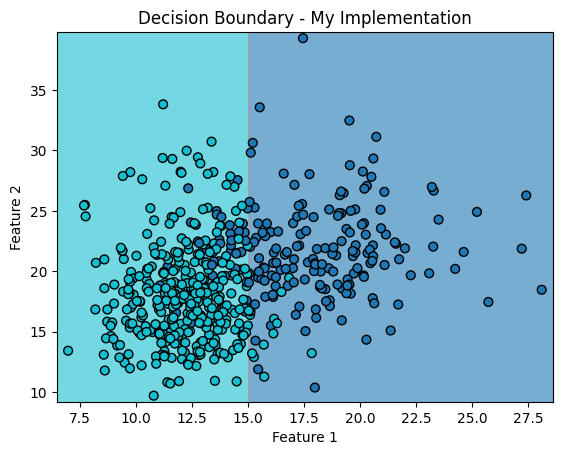

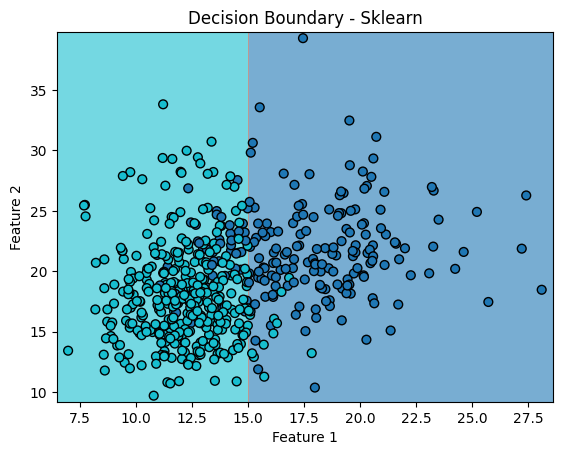

In [7]:
import matplotlib.pyplot as plt

# Use only the first two features for visualization
X_vis = cancer.data[:, :2]
y_vis = cancer.target

my_clf_vis = MyDecisionTreeClassifier(
    criterion="gini",
    splitter="best",
    max_depth=2,
    min_samples_split=4,
    min_samples_leaf=2,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=42,
    class_weight=None,
    ccp_alpha=0.0,
)
my_clf_vis.fit(X_vis, y_vis)

sk_clf_vis = DecisionTreeClassifier(
    criterion="gini",
    splitter="best",
    max_depth=2,
    min_samples_split=4,
    min_samples_leaf=2,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=42,
    class_weight=None,
    ccp_alpha=0.0,
)
sk_clf_vis.fit(X_vis, y_vis)

# Create mesh grid
x_min, x_max = X_vis[:, 0].min() - 0.5, X_vis[:, 0].max() + 0.5
y_min, y_max = X_vis[:, 1].min() - 0.5, X_vis[:, 1].max() + 0.5
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

# Predictions on grid
Z_my = my_clf_vis.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_sk = sk_clf_vis.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot our implementation
plt.figure()
plt.contourf(xx, yy, Z_my, cmap="tab10", alpha=0.6)   
plt.scatter(
    X_vis[:, 0], X_vis[:, 1],
    c=y_vis,
    cmap="tab10",       
    edgecolors="k",      
    s=40                 
)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary - My Implementation")
plt.show()

# Plot sklearn implementation
plt.figure()
plt.contourf(xx, yy, Z_sk, cmap="tab10", alpha=0.6)
plt.scatter(
    X_vis[:, 0], X_vis[:, 1],
    c=y_vis,
    cmap="tab10",
    edgecolors="k",
    s=40
)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary - Sklearn")
plt.show()


To visually compare the decision boundaries of the two models, we retrain both classifiers using only the first two features of the breast cancer dataset (Scikit-learn, 2024b; Scikit-learn, 2024a). 
As shown in the figures, the decision boundaries produced by our model and the sklearn's are identical. Both models partition the feature space in the same manner.

### 4.3 Confusion Matrix Comparison

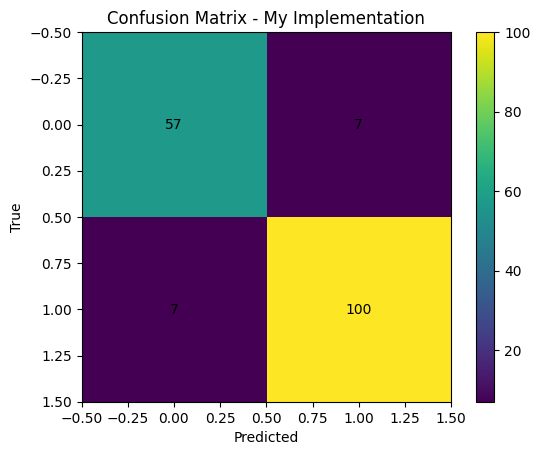

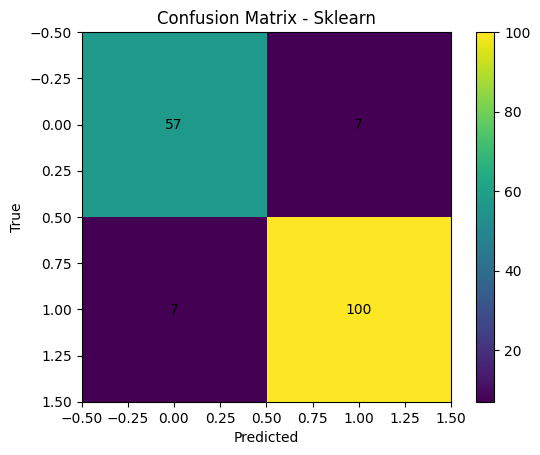

In [8]:
cm_my = confusion_matrix(y_test, my_pred)
cm_sk = confusion_matrix(y_test, sk_pred)

# Our confusion matrix
plt.figure()
plt.imshow(cm_my)
plt.title("Confusion Matrix - My Implementation")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.colorbar()
for i in range(cm_my.shape[0]):
    for j in range(cm_my.shape[1]):
        plt.text(j, i, cm_my[i, j], ha="center", va="center")
plt.show()

# Sklearn confusion matrix
plt.figure()
plt.imshow(cm_sk)
plt.title("Confusion Matrix - Sklearn")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.colorbar()
for i in range(cm_sk.shape[0]):
    for j in range(cm_sk.shape[1]):
        plt.text(j, i, cm_sk[i, j], ha="center", va="center")
plt.show()


 From the confusion matrices, it can be seen that our model and the sklearn model give the same classification results for all the samples. This indicates that the overall classification performance of the two models is the same. This result is also consistent with the Pediction agreement ratio.

### 4.4 Precision & Recall Comparison

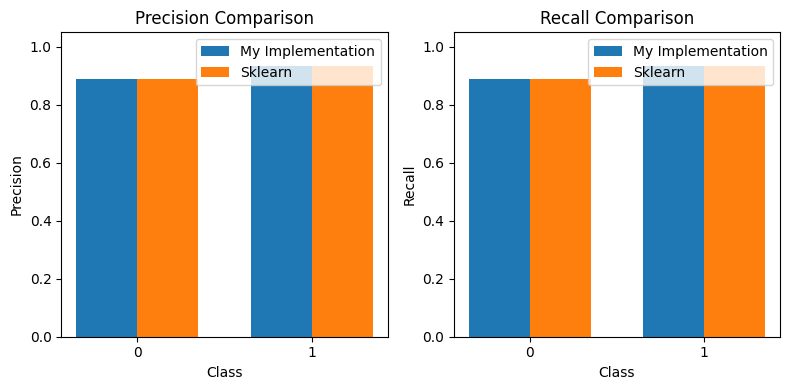

In [9]:
from sklearn.metrics import precision_score, recall_score
import numpy as np
import matplotlib.pyplot as plt

classes = np.unique(y_test)

# Compute per-class precision and recall
prec_my = precision_score(y_test, my_pred, average=None)
rec_my  = recall_score(y_test, my_pred, average=None)

prec_sk = precision_score(y_test, sk_pred, average=None)
rec_sk  = recall_score(y_test, sk_pred, average=None)

x = np.arange(len(classes))
width = 0.35

plt.figure(figsize=(8,4))

# Precision
plt.subplot(1,2,1)
plt.bar(x - width/2, prec_my, width, label="My Implementation")
plt.bar(x + width/2, prec_sk, width, label="Sklearn")
plt.xticks(x, classes)
plt.ylim(0,1.05)
plt.title("Precision Comparison")
plt.xlabel("Class")
plt.ylabel("Precision")
plt.legend()

# Recall
plt.subplot(1,2,2)
plt.bar(x - width/2, rec_my, width, label="My Implementation")
plt.bar(x + width/2, rec_sk, width, label="Sklearn")
plt.xticks(x, classes)
plt.ylim(0,1.05)
plt.title("Recall Comparison")
plt.xlabel("Class")
plt.ylabel("Recall")
plt.legend()

plt.tight_layout()
plt.show()


The results show that both models exhibit consistent behavior.

### 4.5 Further validation on the Wine dataset

Because the Breast Cancer dataset is a binary classification dataset, in order to verify whether our model can also exactly match the performance of sklearn’s DecisionTreeClassifier on a multi-class dataset, we additionally evaluate both models on the Wine dataset from the UCI repository, accessed via the scikit-learn interface (Scikit-learn, 2024c). The Wine dataset contains 13 continuous features and three classes, which provides a more challenging test scenario.

Using the Wine dataset allows us to further validate the consistency and robustness of our implementation on a higher-dimensional and more realistic classification task. 

Again, the result shows that our model aligns well with sklearn.

In [10]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=0,  
    stratify=y
)

# Define hyperparameters (near-perfect match you found)
params = dict(
    criterion="entropy",
    splitter="best",
    max_depth=3,
    min_samples_split=4,
    min_samples_leaf=2,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=0,
    class_weight=None,
    ccp_alpha=0.0,
)

# Train our implementation
my_clf = MyDecisionTreeClassifier(**params)
my_clf.fit(X_train, y_train)

my_pred = my_clf.predict(X_test)
my_proba = my_clf.predict_proba(X_test)
my_acc = accuracy_score(y_test, my_pred)

# Train sklearn implementation
sk_clf = DecisionTreeClassifier(**params)
sk_clf.fit(X_train, y_train)

sk_pred = sk_clf.predict(X_test)
sk_proba = sk_clf.predict_proba(X_test)
sk_acc = accuracy_score(y_test, sk_pred)

# Prediction-level comparison
agreement_ratio = np.mean(my_pred == sk_pred)

cm_my = confusion_matrix(y_test, my_pred)
cm_sk = confusion_matrix(y_test, sk_pred)

print("Prediction agreement ratio:", agreement_ratio)
print(f"My Accuracy      : {my_acc:.6f}")
print(f"Sklearn Accuracy : {sk_acc:.6f}")

# -------- split-level comparison (feature + threshold) --------
my_splits = extract_splits_my(my_clf.root_)
sk_splits = extract_splits_sk(sk_clf.tree_)

feature_match_ratio, thr_diff_mean, _, _ = compare_split_features(my_splits, sk_splits)

print()
print(f"#internal nodes (my)      : {len(my_splits)}")
print(f"#internal nodes (sklearn) : {len(sk_splits)}")
print(f"Feature index match ratio : {feature_match_ratio:.6f}")
print(f"Mean threshold difference : {thr_diff_mean:.6e}")
print()

# sanity checks
assert agreement_ratio > 0.95, "Prediction agreement too low"
assert abs(my_acc - sk_acc) < 0.05, "Accuracy difference too large"

print("Our implementation successfully reproduces the sklearn results on Wine.")

Prediction agreement ratio: 1.0
My Accuracy      : 0.981481
Sklearn Accuracy : 0.981481

#internal nodes (my)      : 5
#internal nodes (sklearn) : 5
Feature index match ratio : 1.000000
Mean threshold difference : 2.574921e-08

Our implementation successfully reproduces the sklearn results on Wine.


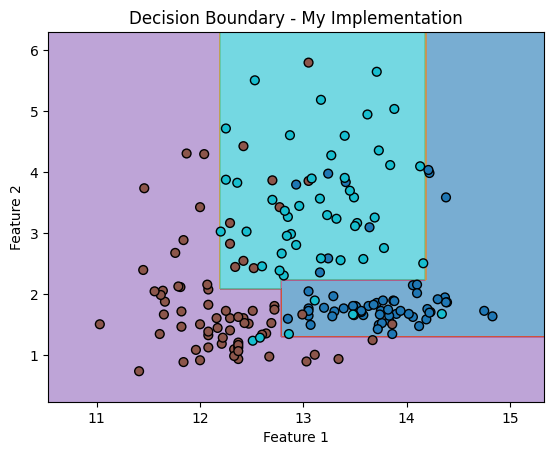

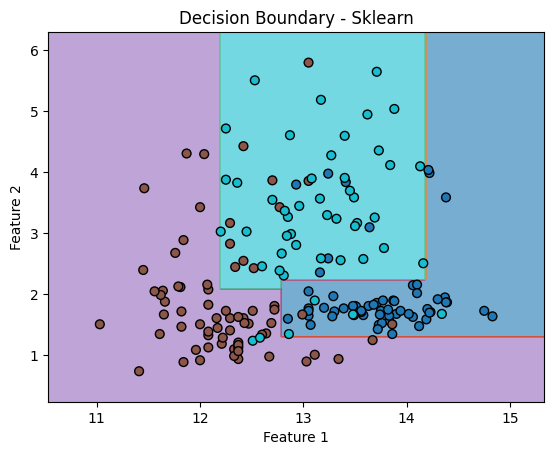

In [11]:
import matplotlib.pyplot as plt

# Use only the first two features for visualization
X_vis = wine.data[:, :2]
y_vis = wine.target

my_clf_vis = MyDecisionTreeClassifier(
    criterion="entropy",
    splitter="best",
    max_depth=3,
    min_samples_split=4,
    min_samples_leaf=2,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=0,
    class_weight=None,
    ccp_alpha=0.0,
)
my_clf_vis.fit(X_vis, y_vis)

sk_clf_vis = DecisionTreeClassifier(
    criterion="entropy",
    splitter="best",
    max_depth=3,
    min_samples_split=4,
    min_samples_leaf=2,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=0,
    class_weight=None,
    ccp_alpha=0.0,
)
sk_clf_vis.fit(X_vis, y_vis)

# Create mesh grid
x_min, x_max = X_vis[:, 0].min() - 0.5, X_vis[:, 0].max() + 0.5
y_min, y_max = X_vis[:, 1].min() - 0.5, X_vis[:, 1].max() + 0.5
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

# Predictions on grid
Z_my = my_clf_vis.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_sk = sk_clf_vis.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot our implementation
plt.figure()
plt.contourf(xx, yy, Z_my, cmap="tab10", alpha=0.6)   
plt.scatter(
    X_vis[:, 0], X_vis[:, 1],
    c=y_vis,
    cmap="tab10",       
    edgecolors="k",      
    s=40                 
)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary - My Implementation")
plt.show()

# Plot sklearn implementation
plt.figure()
plt.contourf(xx, yy, Z_sk, cmap="tab10", alpha=0.6)
plt.scatter(
    X_vis[:, 0], X_vis[:, 1],
    c=y_vis,
    cmap="tab10",
    edgecolors="k",
    s=40
)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary - Sklearn")
plt.show()

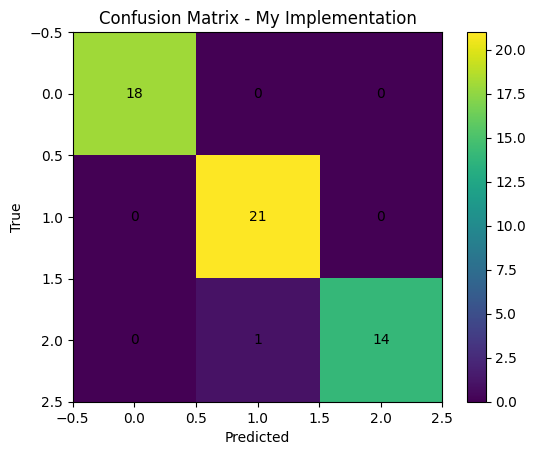

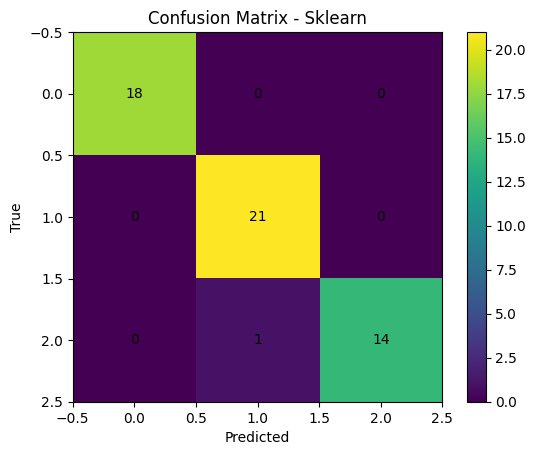

In [12]:
cm_my = confusion_matrix(y_test, my_pred)
cm_sk = confusion_matrix(y_test, sk_pred)

# Our confusion matrix
plt.figure()
plt.imshow(cm_my)
plt.title("Confusion Matrix - My Implementation")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.colorbar()
for i in range(cm_my.shape[0]):
    for j in range(cm_my.shape[1]):
        plt.text(j, i, cm_my[i, j], ha="center", va="center")
plt.show()

# Sklearn confusion matrix
plt.figure()
plt.imshow(cm_sk)
plt.title("Confusion Matrix - Sklearn")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.colorbar()
for i in range(cm_sk.shape[0]):
    for j in range(cm_sk.shape[1]):
        plt.text(j, i, cm_sk[i, j], ha="center", va="center")
plt.show()


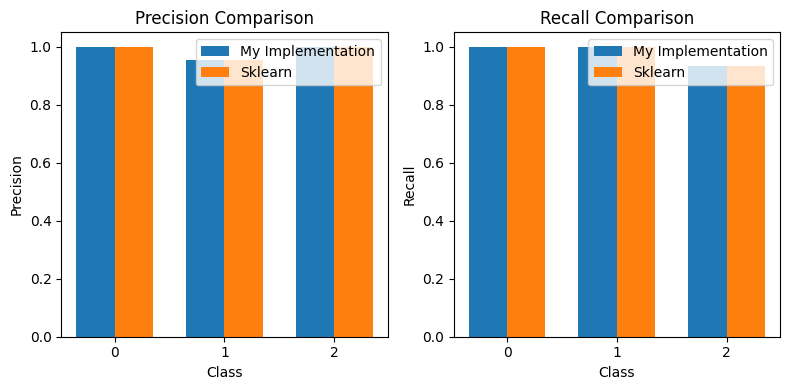

In [13]:
from sklearn.metrics import precision_score, recall_score
import numpy as np
import matplotlib.pyplot as plt

classes = np.unique(y_test)

# Compute per-class precision and recall
prec_my = precision_score(y_test, my_pred, average=None)
rec_my  = recall_score(y_test, my_pred, average=None)

prec_sk = precision_score(y_test, sk_pred, average=None)
rec_sk  = recall_score(y_test, sk_pred, average=None)

x = np.arange(len(classes))
width = 0.35

plt.figure(figsize=(8,4))

# Precision
plt.subplot(1,2,1)
plt.bar(x - width/2, prec_my, width, label="My Implementation")
plt.bar(x + width/2, prec_sk, width, label="Sklearn")
plt.xticks(x, classes)
plt.ylim(0,1.05)
plt.title("Precision Comparison")
plt.xlabel("Class")
plt.ylabel("Precision")
plt.legend()

# Recall
plt.subplot(1,2,2)
plt.bar(x - width/2, rec_my, width, label="My Implementation")
plt.bar(x + width/2, rec_sk, width, label="Sklearn")
plt.xticks(x, classes)
plt.ylim(0,1.05)
plt.title("Recall Comparison")
plt.xlabel("Class")
plt.ylabel("Recall")
plt.legend()

plt.tight_layout()
plt.show()

### **(5.) Summary**
In this project, we implemented a CART decision tree classifier from scratch and evaluated its performance by comparing it with the DecisionTreeClassifier provided by sklearn. The primary validation was conducted on the Breast Cancer dataset, which is a standard benchmark for multi-class classification. The experimental results demonstrate that our implementation closely matches the sklearn model in both quantitative performance and qualitative behavior.

Across a range of evaluation metrics, the results indicate that our implementation closely matches sklearn’s DecisionTreeClassifier, with a prediction agreement ratio of 100% and consistent class-wise performance.

### **(6.) Reference**

Breiman, L. (1996) ‘Bagging predictors’, Machine Learning, 24(2), pp. 123–140.

Breiman, L., Friedman, J., Olshen, R. and Stone, C. (1984) Classification and Regression Trees. Monterey, CA: Wadsworth.

Hastie, T., Tibshirani, R. and Friedman, J. (2009) The Elements of Statistical Learning. 2nd edn. New York: Springer.

Kotsiantis, S. (2007) ‘Supervised machine learning: A review of classification techniques’, Informatica, 31(3), pp. 249–268.

Loh, W.Y. (2011) ‘Classification and regression trees’, Wiley Interdisciplinary Reviews: Data Mining and Knowledge Discovery, 1(1), pp. 14–23.

Scikit-learn (2024a). DecisionTreeClassifier [Online]. Scikit-learn documentation. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html.

Scikit-learn (2024b). Breast cancer Wisconsin (diagnostic) dataset [Online]. Scikit-learn documentation. Available at: https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-wisconsin-diagnostic-dataset.

Scikit-learn (2024c). Wine recognition dataset [Online]. Scikit-learn documentation. Available at: https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-recognition-dataset.
